In [5]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator


In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2021-02-09 16:12:40--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolvendo storage.googleapis.com (storage.googleapis.com)... 2800:3f0:4004:803::2010, 2800:3f0:4004:80a::2010, 2800:3f0:4004:80b::2010, ...
Conectando-se a storage.googleapis.com (storage.googleapis.com)|2800:3f0:4004:803::2010|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 200682221 (191M) [application/zip]
Salvando em: “/tmp/rps.zip”

/tmp/rps.zip        100%[===================>] 191,38M  5,88MB/s    em 33s     

2021-02-09 16:13:13 (5,83 MB/s) - “/tmp/rps.zip” salvo [200682221/200682221]

--2021-02-09 16:13:14--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolvendo storage.googleapis.com (storage.googleapis.com)... 2800:3f0:4004:803::2010, 2800:3f0:4004:802::2010, 2800:3f0:4004:80b::2010, ...
Conectando-se a storage.googleapis.com (storage.googleapis.com)|2800:3f0:4004:803::2010|:443... conectado.
A requis

In [2]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [3]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock05ck01-004.png', 'rock05ck01-077.png', 'rock06ck02-059.png', 'rock07-k03-064.png', 'rock06ck02-084.png', 'rock01-017.png', 'rock04-014.png', 'rock01-083.png', 'rock07-k03-002.png', 'rock03-046.png']
['paper06-115.png', 'paper06-056.png', 'paper07-030.png', 'paper05-081.png', 'paper07-008.png', 'paper06-113.png', 'paper01-048.png', 'paper06-062.png', 'paper07-031.png', 'paper02-089.png']
['scissors02-031.png', 'scissors02-053.png', 'scissors01-011.png', 'scissors04-012.png', 'testscissors02-025.png', 'scissors03-091.png', 'testscissors02-000.png', 'scissors04-119.png', 'scissors04-041.png', 'testscissors01-019.png']


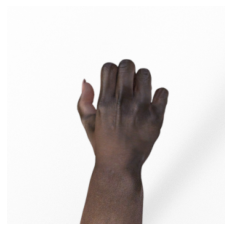

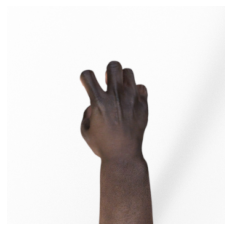

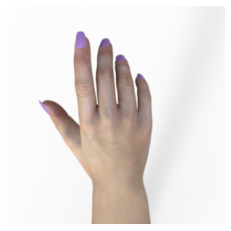

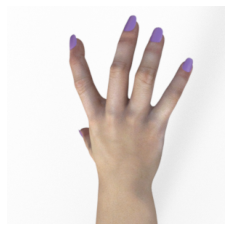

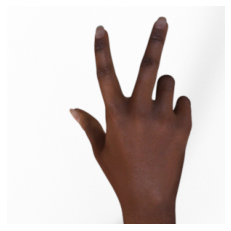

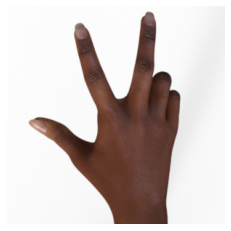

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [7]:
TRAINING_DIR = '/tmp/rps/'

training_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"

validation_datagen = ImageDataGenerator(rescale=1./255)

training_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=126)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=126)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [9]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(training_generator, epochs=25, steps_per_epoch=20, validation_data=validation_generator, verbose=1, validation_steps=3)

model.save('rps.h5')

Epoch 1/25
20/20 [==============================] - 31s 2s/step - loss: 1.9137 - accuracy: 0.3284 - val_loss: 1.0851 - val_accuracy: 0.5000
Epoch 2/25
20/20 [==============================] - 30s 1s/step - loss: 1.2028 - accuracy: 0.3705 - val_loss: 1.1044 - val_accuracy: 0.5000
Epoch 3/25
20/20 [==============================] - 30s 1s/step - loss: 1.0684 - accuracy: 0.4379 - val_loss: 0.7791 - val_accuracy: 0.6183
Epoch 4/25
20/20 [==============================] - 30s 1s/step - loss: 0.9542 - accuracy: 0.5275 - val_loss: 0.7702 - val_accuracy: 0.8575
Epoch 5/25
20/20 [==============================] - 30s 1s/step - loss: 0.8095 - accuracy: 0.6627 - val_loss: 0.5661 - val_accuracy: 0.7661
Epoch 6/25
20/20 [==============================] - 29s 1s/step - loss: 0.7142 - accuracy: 0.6831 - val_loss: 0.4221 - val_accuracy: 0.9570
Epoch 7/25
20/20 [==============================] - 29s 1s/step - loss: 0.5621 - accuracy: 0.7452 - val_loss: 0.4508 - val_accuracy: 0.6989
Epoch 8/25
20/20 [==

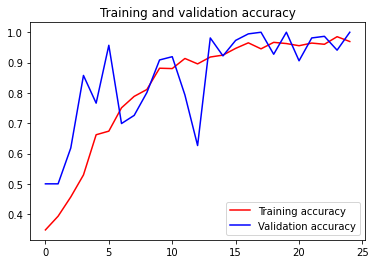

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()